In [1]:
import numpy as np
#import random
#import os
#import pandas as pd
import tensorflow as tf
#import matplotlib.pyplot as plt
#!pip install mitdeeplearning
#import mitdeeplearning as mdl
#!pip install -U mxnet-cu101==1.7.0

# **I. Đạo hàm Một chiều**

### *Hàm trị tuyệt đối $y=|x|$*

In [2]:
x = tf.constant(3.)
with tf.GradientTape() as g:
  y = tf.math.abs(x)
dy_dx = g.gradient(y, x) 
print(dy_dx)

None


In [3]:
x = tf.constant(0.)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.log(x**3 * tf.sin(x))
dy_dx = g.gradient(y, x) 
dy_dx.numpy()

nan

### *Hàm sin(x)*

Đạo hàm của $sin(x)$ là $cos(x)$

In [4]:
x = tf.constant(0.)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.sin(x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### *Hàm cos(x)*
Đạo hàm của $cos(x)$ là $-sin(x)$

In [5]:
x = tf.constant(30. * np.pi / 180.)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.cos(x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5>

In [6]:
# Test
-tf.math.sin(30.0 * np.pi / 180.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5>

### *Hàm ln(x)*
Đạo hàm của $\ln(x)$ là $\frac{1}{x}$

In [7]:
x = tf.constant(10.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.log(x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=0.1>

In [8]:
# Test:
1/10

0.1

### Đạo hàm của hàm $e^x$ là chính nó

In [9]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.exp(x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=148.41316>

In [10]:
# Test
tf.math.exp(x)

<tf.Tensor: shape=(), dtype=float32, numpy=148.41316>

### *Đạo hàm của $\sqrt{x}$ là $\frac{1}{2\sqrt{x}}$*

In [11]:
x = tf.constant(4.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.math.sqrt(x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [12]:
# Test:
1 / (2 * tf.math.sqrt(x))

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

### *Đạo hàm của $\frac{1}{x}$ là $-\frac{1}{x^2}$*

In [13]:
x = tf.constant(4.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = 1 / x
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=-0.0625>

In [14]:
# Test:
-1/(x**2)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.0625>

# **II. Quy tắc chuỗi**

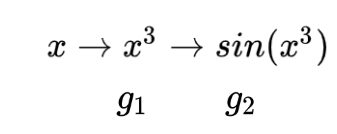

In [15]:
x = tf.constant(4.0)
with tf.GradientTape() as g:
  g.watch(x)
  g1 = x ** 3
  g2 = tf.math.sin(g1)
dy_dx = g.gradient(g2, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=18.809147>

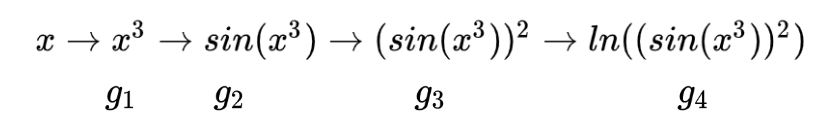

In [16]:
x = tf.constant(4.0)
with tf.GradientTape() as g:
  g.watch(x)
  g1 = x ** 3
  g2 = tf.math.sin(g1)
  g3 = g2 ** 2
  g4 = tf.math.log(g3)
dy_dx = g.gradient(g4, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=40.88829>

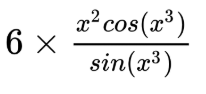

In [17]:
# Test:
6 * x**2 * tf.math.cos(x**3)/ tf.math.sin(x**3)

<tf.Tensor: shape=(), dtype=float32, numpy=40.88829>

# **III. Đạo hàm hai chiều**

#### *Quy tắc chuỗi nhiều biến*

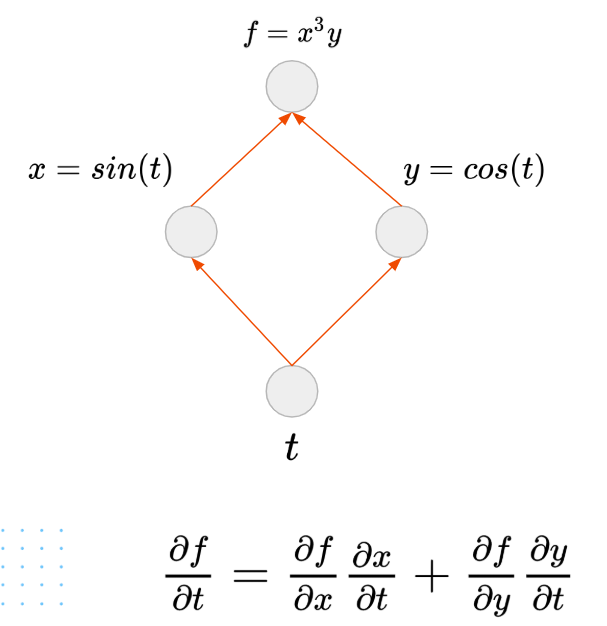

In [18]:
t = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(t)
  x = tf.math.sin(t)
  y = tf.math.cos(t)
  f = x**3 * y
dy_dt = g.gradient(f, t)
dy_dt

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6235769>

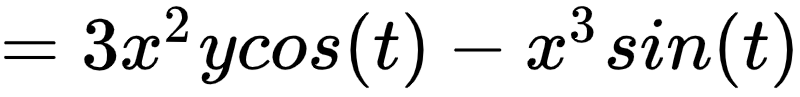

In [19]:
# Test
def cal(t):
  x = tf.math.sin(t)
  y = tf.math.cos(t)
  return 3 * x**2 * y * tf.math.cos(t) - x**3 * tf.math.sin(t)
cal(5.0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6235769>